In [1]:
import rich as R

# Dependencies

In [2]:
from summarize import (
    XED_TYPES,
    get_raw_results,
    summarize_demand_draws,
    summarize_supply_injections,
    summarize_distributed_slack,
    summarize_voltage_mags,
)

# Results data

In [3]:
raw = get_raw_results(system="AEP57", drop_infeasible=True)

# Summarize demand draws

In [4]:
print("Averages of total active demand")
print(f"{' '*3}{(raw['meanPds'].sum() * raw['multPds']).mean()}")

print("Standard deviations of total active demand")
print(f"{' '*3}{(raw['meanPds'].sum() * raw['multPds']).std()}")

print("Averages of total reactive demand")
print(f"{' '*3}{(raw['meanQds'].sum() * raw['multQds']).mean()}")

print("Standard deviations of total reactive demand")
print(f"{' '*3}{(raw['meanQds'].sum() * raw['multQds']).std()}")

Averages of total active demand
   12.375215196747538
Standard deviations of total active demand
   0.6131862805260756
Averages of total reactive demand
   3.558142458034572
Standard deviations of total reactive demand
   0.1748086902175684


   Plots saved to 'PdQd_AEP57.pdf'


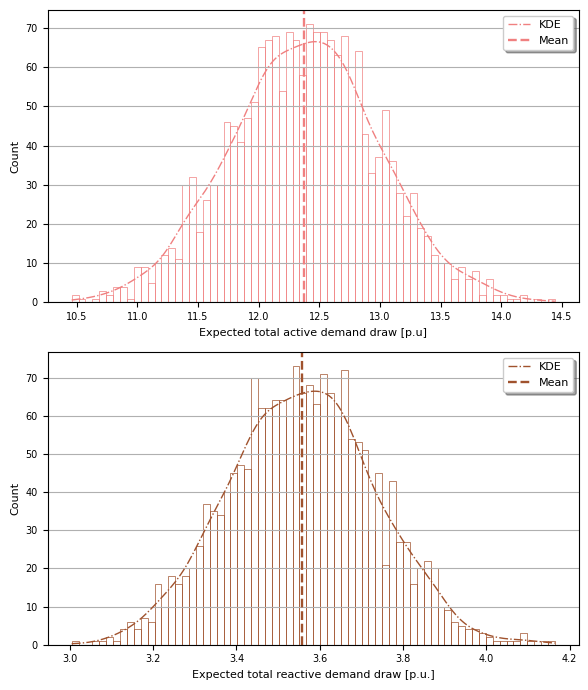

In [5]:
fig_PdQd = summarize_demand_draws(raw, num_bins=70)

# Summarize anticipated supply injections

In [6]:
print("Averages of total active supply")
for xed_type in XED_TYPES: print(
    f"{' '*3}{xed_type}",
    raw[f"{xed_type}Pus"].sum(axis=-1).mean(),
    sep=": "
)

print("Standard deviations of total active supply")
for xed_type in XED_TYPES: print(
    f"{' '*3}{xed_type}",
    raw[f"{xed_type}Pus"].sum(axis=-1).std(),
    sep=": "
)

print("Averages of total reactive supply")
for xed_type in XED_TYPES: print(
    f"{' '*3}{xed_type}",
    raw[f"{xed_type}Qus"].sum(axis=-1).mean(),
    sep=": "
)

print("Standard deviations of total reactive supply")
for xed_type in XED_TYPES: print(
    f"{' '*3}{xed_type}",
    raw[f"{xed_type}Qus"].sum(axis=-1).std(),
    sep=": "
)

Averages of total active supply
   uu: 12.543698993002021
   ur: 12.543698993002012
   ru: 12.543698993126204
   rr: 12.54369899309606
Standard deviations of total active supply
   uu: 0.603689159699039
   ur: 0.603689159699038
   ru: 0.6036891598175999
   rr: 0.6036891597860671
Averages of total reactive supply
   uu: 2.960749067407157
   ur: 2.960749067407141
   ru: 2.9607490674071495
   rr: 2.960749067398877
Standard deviations of total reactive supply
   uu: 0.16845369616695338
   ur: 0.16845369616695657
   ru: 0.16845369616694453
   rr: 0.16845369617594474


   Plots saved to 'PuQu-uu_AEP57.pdf'


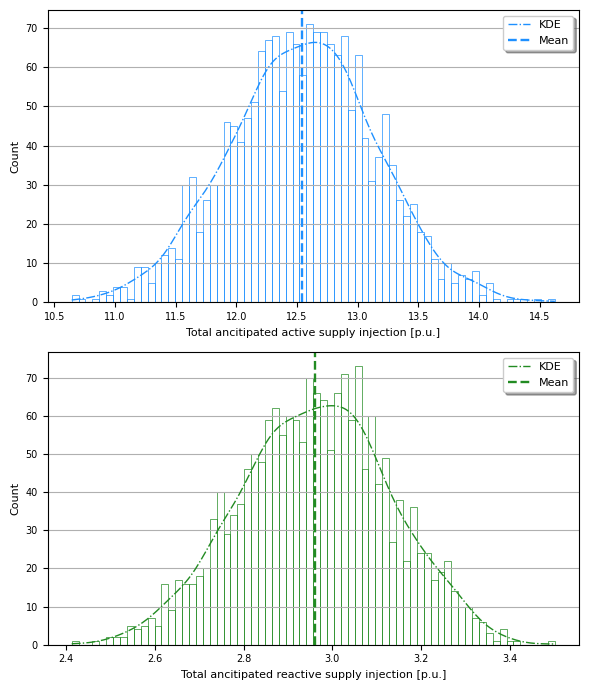

In [7]:
fig_PuQu_uu = summarize_supply_injections(raw, num_bins=70, xed_type="uu")

   Plots saved to 'PuQu-ur_AEP57.pdf'


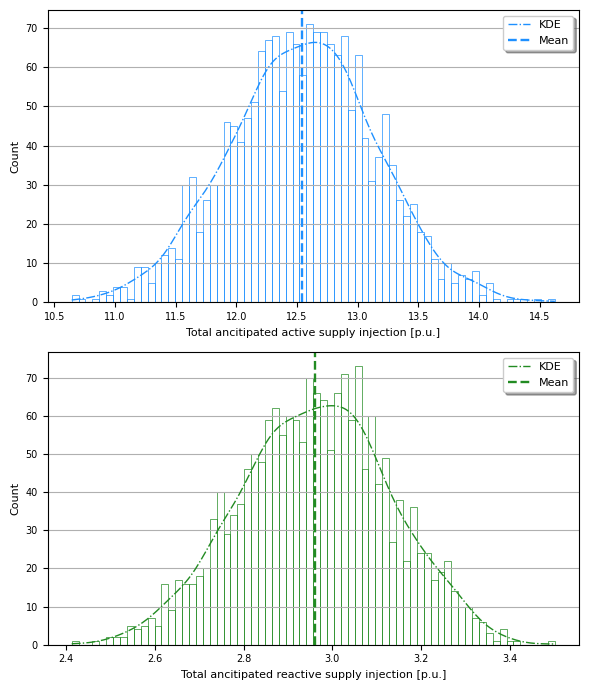

In [8]:
fig_PuQu_ur = summarize_supply_injections(raw, num_bins=70, xed_type="ur")

   Plots saved to 'PuQu-ru_AEP57.pdf'


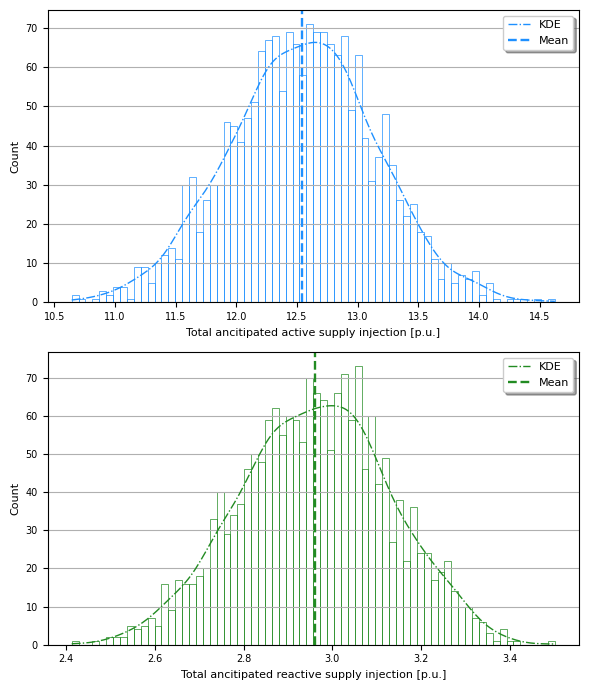

In [9]:
fig_PuQu_ru = summarize_supply_injections(raw, num_bins=70, xed_type="ru")

   Plots saved to 'PuQu-rr_AEP57.pdf'


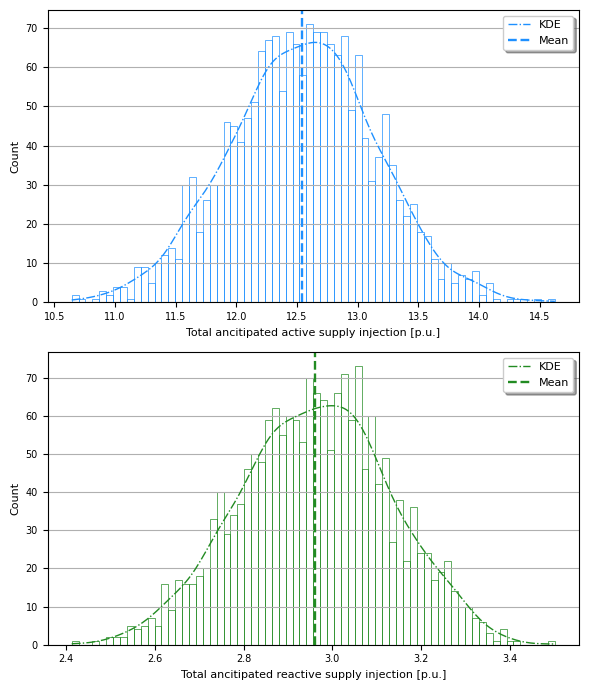

In [10]:
fig_PuQu_rr = summarize_supply_injections(raw, num_bins=70, xed_type="rr")

# Summarize anticipated bus voltage magnitudes

In [11]:
print("Averages over all bus-voltage magnitudes")
for xed_type in XED_TYPES: print(
    f"{' '*3}{xed_type}",
    raw[f"{xed_type}Vms"].flatten().mean(),
    sep=": "
)

print("Standard deviations over all bus-voltage magnitudes")
for xed_type in XED_TYPES: print(
    f"{' '*3}{xed_type}",
    raw[f"{xed_type}Vms"].flatten().std(),
    sep=": "
)


print("Averages over bus with least average voltage magnitudes")
for xed_type in XED_TYPES:
    x = raw[f"{xed_type}Vms"].mean(axis=0)
    idx = x.argmin()
    print(
        f"{' '*3}{xed_type} @ {idx+1}",
        raw[f"{xed_type}Vms"][:, idx].mean(),
        sep=": "
    )

print(f"Standard deviations over bus with least average voltage magnitudes")
for xed_type in XED_TYPES:
    x = raw[f"{xed_type}Vms"].mean(axis=0)
    idx = x.argmin()
    print(
        f"{' '*3}{xed_type} @ {idx+1}",
        raw[f"{xed_type}Vms"][:, idx].std(),
        sep=": "
    )

print("Averages over bus with largest average voltage magnitudes")
for xed_type in XED_TYPES:
    x = raw[f"{xed_type}Vms"].mean(axis=0)
    idx = x.argmax()
    print(
        f"{' '*3}{xed_type} @ {idx+1}",
        raw[f"{xed_type}Vms"][:, idx].mean(),
        sep=": "
    )

print(f"Standard deviations over bus with largest average voltage magnitudes")
for xed_type in XED_TYPES:
    x = raw[f"{xed_type}Vms"].mean(axis=0)
    idx = x.argmax()
    print(
        f"{' '*3}{xed_type} @ {idx+1}",
        raw[f"{xed_type}Vms"][:, idx].std(),
        sep=": "
    )

Averages over all bus-voltage magnitudes
   uu: 1.0064690370713705
   ur: 1.0042984273941031
   ru: 0.9977574792055683
   rr: 0.9956308553700624
Standard deviations over all bus-voltage magnitudes
   uu: 0.029877855314874902
   ur: 0.0299068116150256
   ru: 0.030938909501908505
   rr: 0.030981292241887885
Averages over bus with least average voltage magnitudes
   uu @ 31: 0.9523509677999951
   ur @ 31: 0.9494928242802282
   ru @ 31: 0.9415893751466454
   rr @ 31: 0.9387742834933857
Standard deviations over bus with least average voltage magnitudes
   uu @ 31: 0.0157343144931081
   ur @ 31: 0.015672401918379156
   ru @ 31: 0.017712945019348333
   rr @ 31: 0.01766535516950177
Averages over bus with largest average voltage magnitudes
   uu @ 46: 1.0666009092686048
   ur @ 46: 1.0655747598046532
   ru @ 46: 1.0578195923916254
   rr @ 46: 1.0568491178124106
Standard deviations over bus with largest average voltage magnitudes
   uu @ 46: 0.01577793728488126
   ur @ 46: 0.015760476203590754
 

   Plots saved to 'Vm-uu_AEP57.pdf'


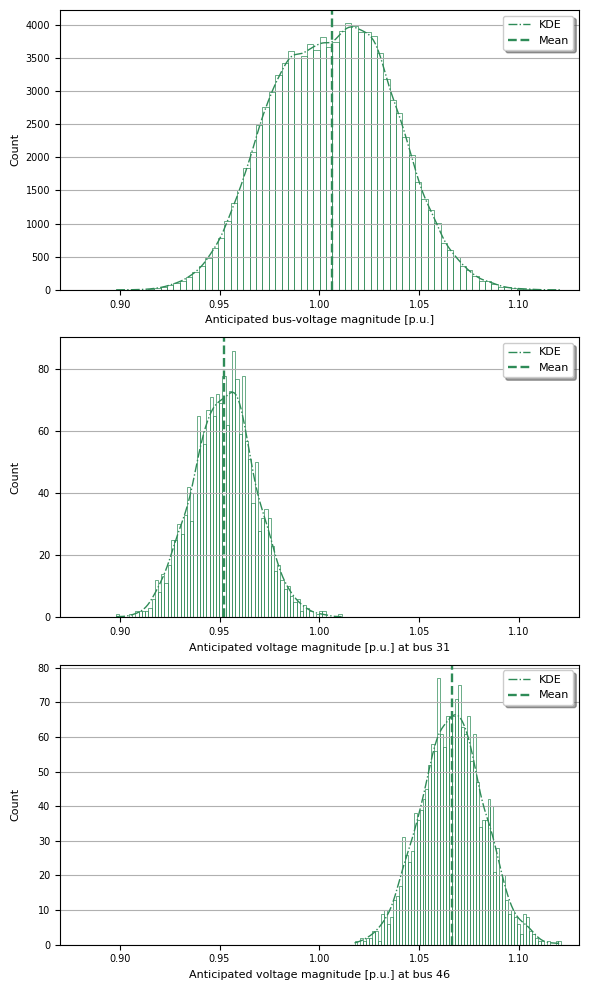

In [12]:
fig_Vm_uu = summarize_voltage_mags(raw, num_bins=70, xed_type="uu")

   Plots saved to 'Vm-ur_AEP57.pdf'


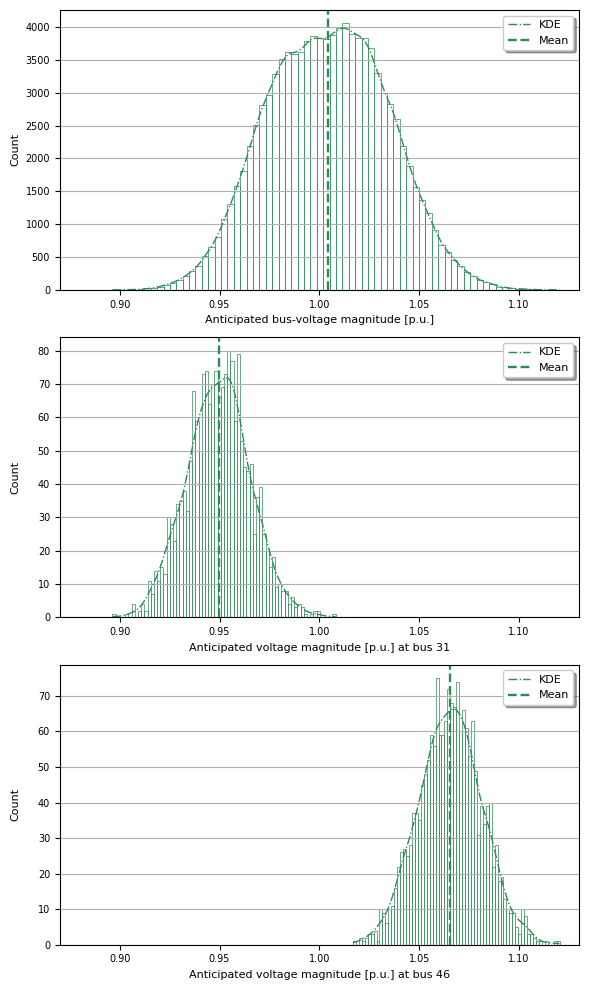

In [13]:
fig_Vm_ur = summarize_voltage_mags(raw, num_bins=70, xed_type="ur")

   Plots saved to 'Vm-ru_AEP57.pdf'


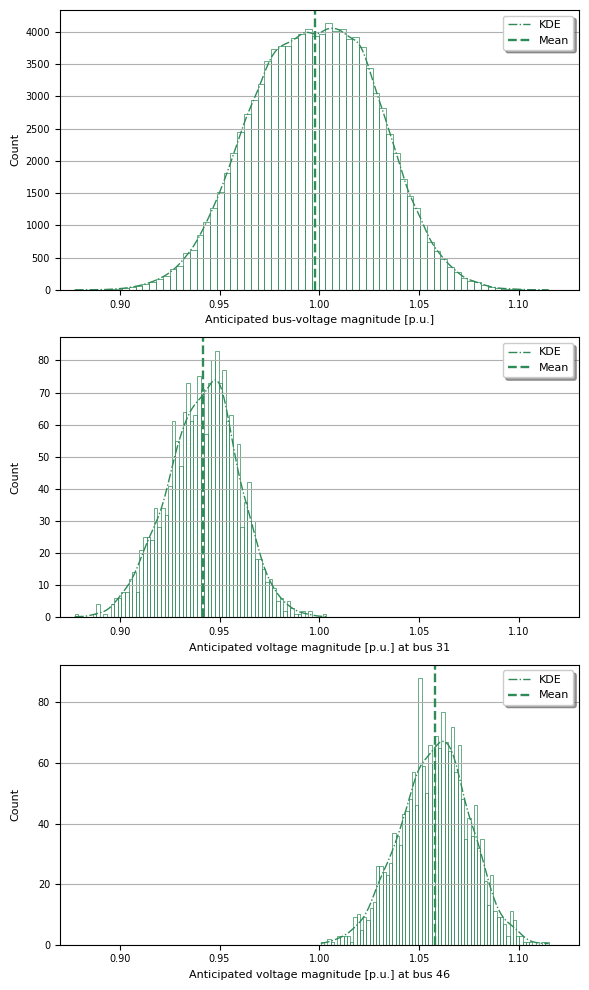

In [14]:
fig_Vm_ru = summarize_voltage_mags(raw, num_bins=70, xed_type="ru")

   Plots saved to 'Vm-rr_AEP57.pdf'


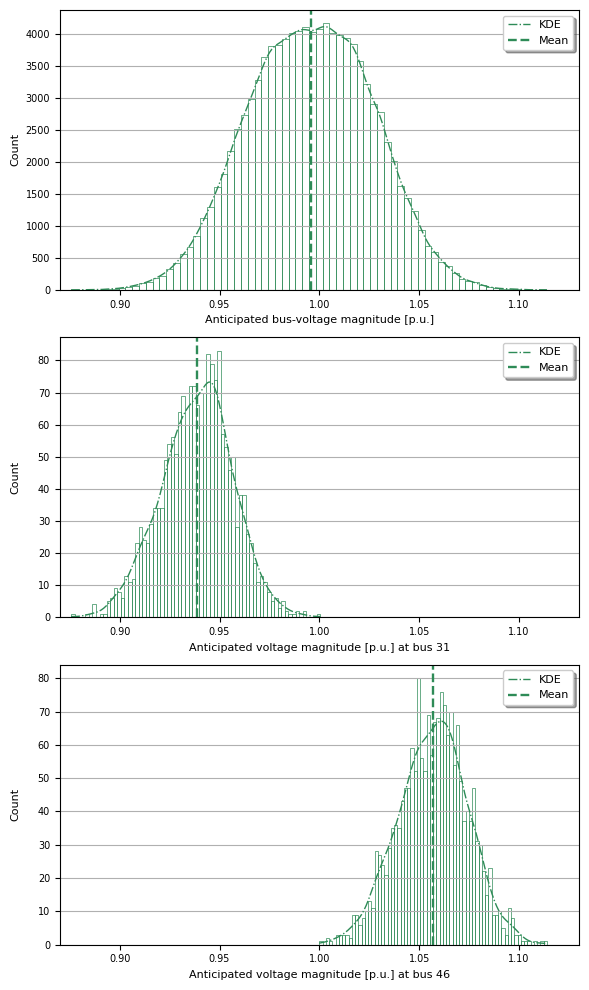

In [15]:
fig_Vm_rr = summarize_voltage_mags(raw, num_bins=70, xed_type="rr")

# Summarize anticipated phase-angle differences

# Summarize anticipated distributed slacks

In [16]:
print("Averages of anticipated distributed slack")
for xed_type in XED_TYPES: print(
    f"{' '*3}{xed_type}",
    raw[f"{xed_type}Ps"].mean(),
    sep=": "
)

print("Standard deviations of anticipated distributed slack")
for xed_type in XED_TYPES: print(
    f"{' '*3}{xed_type}",
    raw[f"{xed_type}Ps"].std(),
    sep=": "
)

Averages of anticipated distributed slack
   uu: 0.005824893644445761
   ur: 0.004742525895548479
   ru: -6.892429587807816e-05
   rr: -0.0011127188835138079
Standard deviations of anticipated distributed slack
   uu: 0.008555495804483724
   ur: 0.008547436346104591
   ru: 0.009919221443240615
   rr: 0.009909332027234706


   Plots saved to 'Ps-uu_AEP57.pdf'


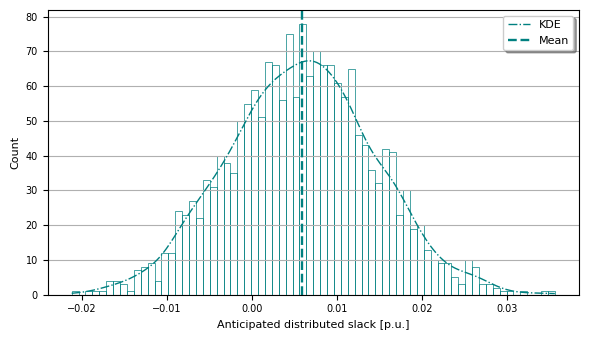

In [17]:
fig_Ps_uu = summarize_distributed_slack(raw, num_bins=70, xed_type="uu")

   Plots saved to 'Ps-ur_AEP57.pdf'


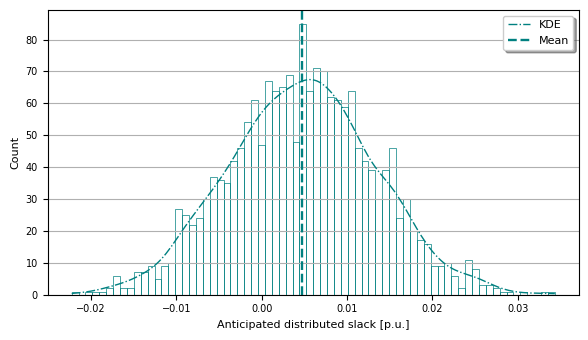

In [18]:
fig_Ps_ur = summarize_distributed_slack(raw, num_bins=70, xed_type="ur")

   Plots saved to 'Ps-ru_AEP57.pdf'


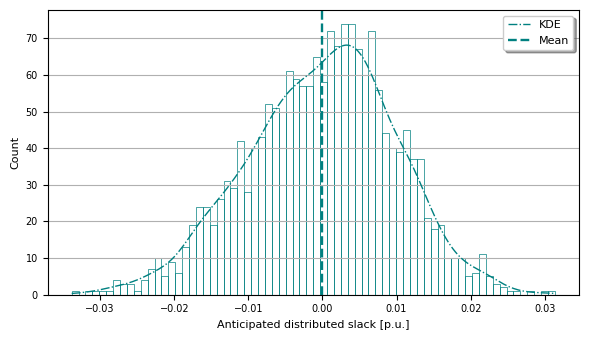

In [19]:
fig_Ps_ru = summarize_distributed_slack(raw, num_bins=70, xed_type="ru")

   Plots saved to 'Ps-rr_AEP57.pdf'


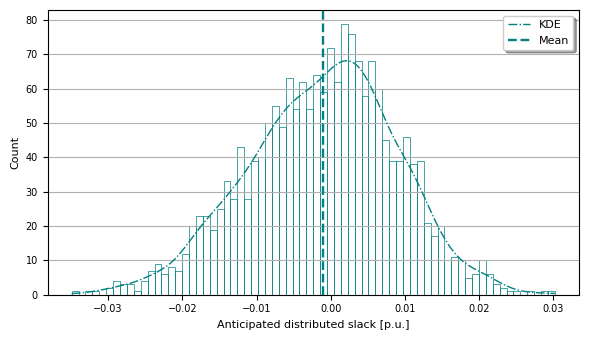

In [20]:
fig_Ps_rr = summarize_distributed_slack(raw, num_bins=70, xed_type="rr")